In [0]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

from sklearn import metrics

from skimage import io, color

import time
import os
import pickle

import matplotlib.pyplot as plt
import scikitplot as skplt

In [0]:
# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [0]:
# resnet152
pickle_in = open('history_resnet152.pkl', 'rb')
history_resnet152 = pickle.load(pickle_in)
pickle_in = open('history_resnet152_101.pkl', 'rb')
history_resnet152_101 = pickle.load(pickle_in)

# densenet161
pickle_in = open('history_densenet161.pkl', 'rb')
history_densenet161 = pickle.load(pickle_in)
pickle_in = open('history_densenet161_197.pkl', 'rb')
history_densenet161_197 = pickle.load(pickle_in)

#googlenet
pickle_in = open('history_gn21.pkl', 'rb')
history_googlenet = pickle.load(pickle_in)


# ResNet

In [0]:
res_train_loss = history_resnet152['train_loss'] + history_resnet152_101['train_loss']
res_valid_loss = history_resnet152['valid_loss'] + history_resnet152_101['valid_loss']
res_train_acc = history_resnet152['train_acc'] + history_resnet152_101['train_acc']
res_valid_acc = history_resnet152['valid_acc'] + history_resnet152_101['valid_acc']
res_valid_auc_score = history_resnet152['valid_auc_score'] + history_resnet152_101['valid_auc_score']

<Figure size 576x1440 with 0 Axes>

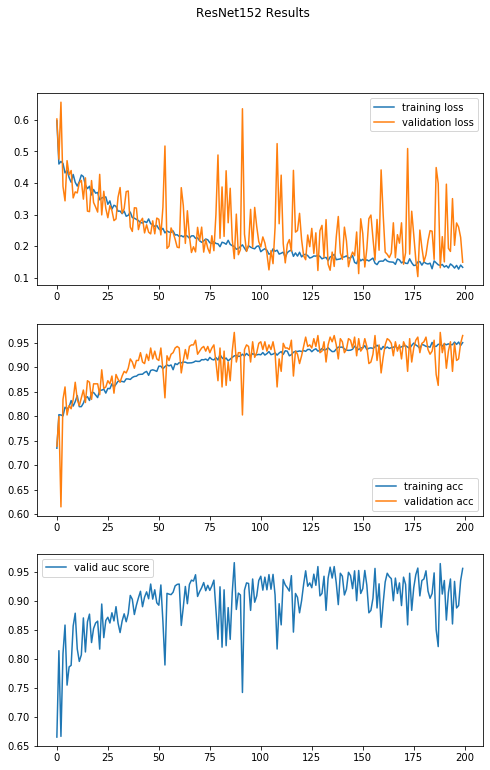

In [0]:
fig = plt.figure(figsize=(8, 20))

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8,12))
fig.suptitle('ResNet152 Results')

ax1.plot(res_train_loss, label='training loss')
ax1.plot(res_valid_loss, label='validation loss')
ax1.legend()

ax2.plot(res_train_acc, label='training acc')
ax2.plot(res_valid_acc, label='validation acc')
ax2.legend()

ax3.plot(res_valid_auc_score, label='valid auc score')
ax3.legend()

In [0]:
print('Highest validation acc: ', max(res_valid_acc), np.argmax(res_valid_acc)+1)
print('Highest validation auc: ', max(res_valid_auc_score), np.argmax(res_valid_auc_score)+1)

Highest validation acc:  0.9713375796178344 88
Highest validation auc:  0.9656786941580756 88


88th epoch has the best results.

In [0]:
res_proabs_stacked = np.vstack(history_resnet152['valid_probas_list'])
res_true_labels = np.concatenate(history_resnet152['valid_truelabels_list'])
res_pred_labels = np.concatenate(history_resnet152['valid_preds_list'])

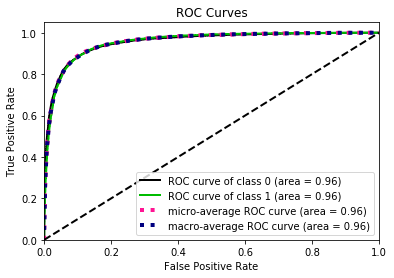

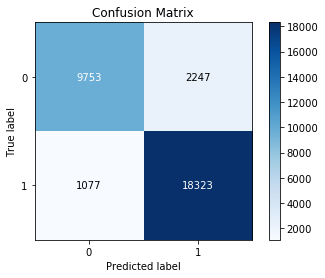

In [0]:
import scikitplot as skplt
skplt.metrics.plot_roc(res_true_labels, res_proabs_stacked)
skplt.metrics.plot_confusion_matrix(res_true_labels, res_pred_labels)

# DenseNet

In [0]:
den_train_loss = history_densenet161['train_loss'] + history_densenet161_197['train_loss']
den_valid_loss = history_densenet161['valid_loss'] + history_densenet161_197['valid_loss']
den_train_acc = history_densenet161['train_acc'] + history_densenet161_197['train_acc']
den_valid_acc = history_densenet161['valid_acc'] + history_densenet161_197['valid_acc']
den_valid_auc_score = history_densenet161['valid_auc_score'] + history_densenet161_197['valid_auc_score']

<Figure size 576x1440 with 0 Axes>

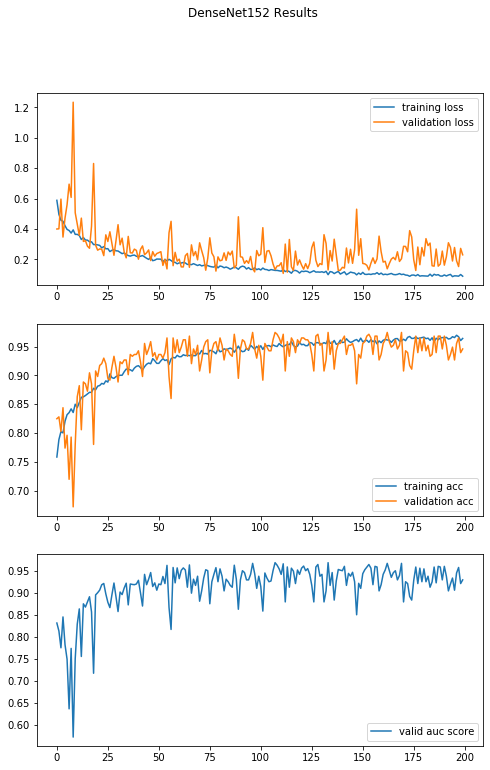

In [0]:
fig = plt.figure(figsize=(8, 20))

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8,12))
fig.suptitle('DenseNet152 Results')

ax1.plot(den_train_loss, label='training loss')
ax1.plot(den_valid_loss, label='validation loss')
ax1.legend()

ax2.plot(den_train_acc, label='training acc')
ax2.plot(den_valid_acc, label='validation acc')
ax2.legend()

ax3.plot(den_valid_auc_score, label='valid auc score')
ax3.legend()

In [0]:
print('Highest validation acc: ', max(den_valid_acc), np.argmax(den_valid_acc)+1)
print('Highest validation auc: ', max(den_valid_auc_score), np.argmax(den_valid_auc_score)+1)

Highest validation acc:  0.9745222929936306 97
Highest validation auc:  0.9682560137457045 108


In [0]:
print(den_valid_acc[97-1], den_valid_auc_score[97-1])
print(den_valid_acc[108-1], den_valid_auc_score[108-1])

0.9745222929936306 0.9666666666666667
0.9745222929936306 0.9682560137457045


108th epoch has the best results.

# GoogleNet

In [0]:
goo_train_loss = history_googlenet['train_loss'] 
goo_valid_loss = history_googlenet['valid_loss'] 
goo_train_acc = history_googlenet['train_acc'] 
goo_valid_acc = history_googlenet['valid_acc'] 
goo_valid_auc_score = history_googlenet['valid_auc_score'] 

<Figure size 576x1440 with 0 Axes>

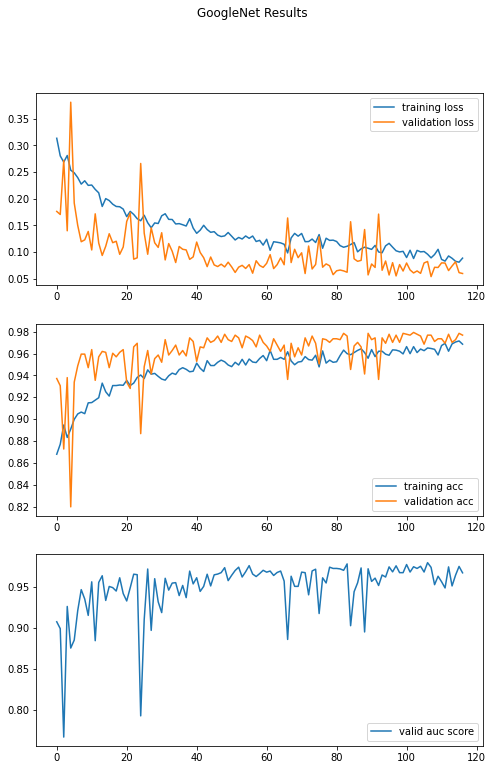

In [0]:
fig = plt.figure(figsize=(8, 20))

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8,12))
fig.suptitle('GoogleNet Results')

ax1.plot(goo_train_loss, label='training loss')
ax1.plot(goo_valid_loss, label='validation loss')
ax1.legend()

ax2.plot(goo_train_acc, label='training acc')
ax2.plot(goo_valid_acc, label='validation acc')
ax2.legend()

ax3.plot(goo_valid_auc_score, label='valid auc score')
ax3.legend()

In [0]:
print('Highest validation acc: ', max(goo_valid_acc), np.argmax(goo_valid_acc)+1)
print('Highest validation auc: ', max(goo_valid_auc_score), np.argmax(goo_valid_auc_score)+1)

Highest validation acc:  0.9793388429752066 103
Highest validation auc:  0.9793478673378209 107


## GoogleNet on test set

In [0]:
#googlenet
pickle_in = open('history_gn2_test.pkl', 'rb')
history_googlenet_test = pickle.load(pickle_in)

In [0]:
goo_acc = history_googlenet_test['test_acc']
goo_loss = history_googlenet_test['test_loss']
goo_proabs_stacked = np.vstack(history_googlenet_test['proabs_list'])
goo_true_labels = np.concatenate(history_googlenet_test['truelabels_list'])
goo_pred_labels = np.concatenate(history_googlenet_test['preds_list'])

In [0]:
#From DSGA-1001 lab
import matplotlib
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
%matplotlib inline
def plotUnivariateROC(preds, truth, label_string, title_string):
    fpr, tpr, thresholds = roc_curve(truth, preds)
    roc_auc = auc(fpr, tpr)
    #we are doing this as a special case because we are sending unfitted predictions #into the function
    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds)
        roc_auc = auc(fpr, tpr)
        #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    #create a plot and set some options
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(title_string)
    plt.legend(loc="lower right")
    plt.savefig(label_string+".jpeg")
    plt.show()
    
    return roc_auc

In [0]:
#preds&truths
def pred_truth(model, dataloader):
    preds = torch.zeros(len(dataloader))
    truths = torch.ones(len(dataloader))
    i = 0
    for data in dataloader:
        image = data['image'].to(device,dtype=torch.float)
        label = data['label'].to(device,dtype=torch.long)
        output = model(image)
        _,pred = torch.max(output, dim = 1)
        preds[i]= pred
        truths[i] = label
        i += 1
        
    return preds, truths

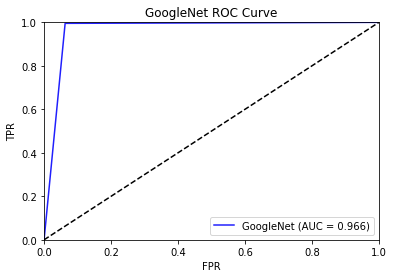

0.9662961227763818

In [0]:
#print('GoogleNet ROC Curve')
preds, truths = pred_truth(model_gn2, test_loader)
plotUnivariateROC(preds, truths, 'GoogleNet', 'GoogleNet ROC Curve')


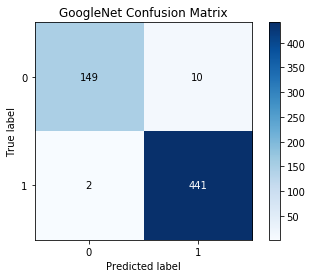

In [0]:
skplt.metrics.plot_confusion_matrix(goo_true_labels, goo_pred_labels, title = 'GoogleNet Confusion Matrix')

# CAM

In [0]:
resnet152 = models.resnet152(pretrained=True)
resnet152 = models.resnet152(num_classes=2)
densenet161 = models.densenet161(pretrained=True)
densenet161 = models.densenet161(num_classes=2)

model_path = 'best_models/resnet152_best_model_88.pth'
resnet152.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [0]:
from skimage import io, color
import requests
from PIL import Image
from torchvision import models, transforms
from torch.autograd import Variable
from torch.nn import functional as F
import numpy as np
import cv2
import pdb


# input image
labels = {0: 'normal', 1: 'pneumonia'}
images = ['NORMAL2-IM-0059-0001.jpeg', 'person134_bacteria_641.jpeg', 'person1625_virus_2817.jpeg']

images = ['NORMAL2-IM-0059-0001.jpeg','person134_bacteria_641.jpeg','person134_bacteria_643.jpeg','person99_bacteria_473.jpeg','person1625_virus_2817.jpeg','NORMAL2-IM-0294-0001.jpeg']


parent_path = 'chest_xray_origin/all/'

# networks such as googlenet, resnet, densenet already use global average pooling at the end, so CAM could be used directly.
model_id = 1
if model_id == 1:
    net = resnet152
    finalconv_name = 'layer4'
elif model_id == 2:
    net = densenet161
    finalconv_name = 'features'


net.eval()

with torch.no_grad():

    # hook the feature extractor
    features_blobs = []
    def hook_feature(module, input, output):
        features_blobs.append(output.data.cpu().numpy())

    net._modules.get(finalconv_name).register_forward_hook(hook_feature)

    # get the softmax weight
    params = list(net.parameters())
    weight_softmax = np.squeeze(params[-2].data.cpu().numpy())

    def returnCAM(feature_conv, weight_softmax, class_idx):
        # generate the class activation maps upsample to 256x256
        size_upsample = (256, 256)
        bz, nc, h, w = feature_conv.shape
        output_cam = []
        for idx in class_idx:
            cam = weight_softmax[idx].dot(feature_conv.reshape((nc, h*w)))
            cam = cam.reshape(h, w)
            cam = cam - np.min(cam)
            cam_img = cam / np.max(cam)
            cam_img = np.uint8(255 * cam_img)
            output_cam.append(cv2.resize(cam_img, size_upsample))
        return output_cam


    normalize = transforms.Normalize(
       mean=[0.485, 0.456, 0.406],
       std=[0.229, 0.224, 0.225]
    )

    preprocess = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize([364,364]),
            transforms.CenterCrop(320),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])


    for j in range(len(images)):
        image_path = parent_path + images[j]

        img_pil = io.imread(image_path, as_gray=True)
        img_pil = np.repeat(img_pil[None,...], 3, axis=0)

        img_tensor = preprocess(img_pil)
        img_variable = img_tensor.unsqueeze(0).cuda()
        output = net(img_variable)

        mysoftmax = nn.Softmax(dim=1)

        output_softmax = mysoftmax(output)
        _, preds = torch.max(output, dim = 1)

        # output the prediction
        for i in range(0, 2):
            print('{:.3f} -> {}'.format(output_softmax[0][i], labels[i]))

        idx_softmax = list([np.argmax(output_softmax[0].cpu().numpy())])
        # generate class activation mapping for the top1 prediction
        CAMs = returnCAM(features_blobs[0], weight_softmax, idx_softmax)


        # render the CAM and output
        print('output CAM' + str(j) + '.jpg for the top1 prediction: %s'%labels[idx_softmax[0]])
        img = cv2.imread(image_path)
        height, width, _ = img.shape
        heatmap = cv2.applyColorMap(cv2.resize(CAMs[0],(width, height)), cv2.COLORMAP_JET)
        result = heatmap * 0.3 + img * 0.5
        cv2.imwrite('CAM' + str(j) + '.jpg', result)


0.007 -> normal
0.993 -> pneumonia
output CAM0.jpg for the top1 prediction: pneumonia
0.004 -> normal
0.996 -> pneumonia
output CAM1.jpg for the top1 prediction: pneumonia
0.035 -> normal
0.965 -> pneumonia
output CAM2.jpg for the top1 prediction: pneumonia
0.074 -> normal
0.926 -> pneumonia
output CAM3.jpg for the top1 prediction: pneumonia
0.454 -> normal
0.546 -> pneumonia
output CAM4.jpg for the top1 prediction: pneumonia
0.202 -> normal
0.798 -> pneumonia
output CAM5.jpg for the top1 prediction: pneumonia


![title](CAM2.jpg)

In [0]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

from sklearn import metrics

from skimage import io, color

import time
import os
import pickle

import matplotlib.pyplot as plt
import scikitplot as skplt

from dataset import ChestXray
from train_valid import train, validation

In [0]:
val_df_path = 'chest_xray_origin/val.csv'

root_dir = 'chest_xray_origin/all/'

bs = 10

validation_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize([364,364]),
        transforms.CenterCrop(320),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

valid_loader = DataLoader(ChestXray(val_df_path, root_dir, transform=validation_transform), batch_size=bs, shuffle=False)

In [0]:
valid_weights = valid_loader.dataset.data_frame.shape[0] / np.array(valid_loader.dataset.data_frame['class'].value_counts())[::-1]

valid_weights = torch.FloatTensor(valid_weights).to(device)

valid_criterion = nn.CrossEntropyLoss(weight=valid_weights)

In [0]:
resnet152 = models.resnet152(pretrained=True)
resnet152 = models.resnet152(num_classes=2)

# training process
model = resnet152

LOAD_MODEL = True
MODEL_PATH = 'best_models/resnet152_best_model_88.pth'

if LOAD_MODEL:
    model.load_state_dict(torch.load(MODEL_PATH))

model.to(device)

history = { "valid_preds_list":[],
             "valid_truelabels_list":[]}

optimizer = optim.Adam(model.parameters())

valid_loss, valid_acc, valid_preds_list, valid_truelabels_list, valid_probas_list, valid_auc_score = validation(88, model, optimizer, valid_criterion, valid_loader, device)
history["valid_preds_list"].append(valid_preds_list)
history["valid_truelabels_list"].append(valid_truelabels_list)

/scratch/yz6126/DL4Med/proj/train_valid.py:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(label, dtype=torch.long, device=device)
